# About Notebook:
I analyze OLX Cars Dataset in 4 different parts:

* Overall Analysis
* Company Brands Wise Analysis
* Models Wise Analysis
* City Wise Analysis


> Data Analysis of OLX Cars Dataset in user-friendly streamlit WebApp: "https://data-analysis-olx-cars-dataset.streamlit.app/"

In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from wordcloud import WordCloud
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/olx-cars-dataset/OLX_cars_dataset00.csv


In [2]:
df = pd.read_csv("/kaggle/input/olx-cars-dataset/OLX_cars_dataset00.csv")
df.head(3)

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...


# Preprocessing Dataset

In [3]:
# constructing new column of city
def constructing_city(col):
    location = col.split(",")
    if len(location)==2:
        return location[1].strip()
    else:
        return None
    
df["City"] = df["Seller Location"].apply(constructing_city)

In [4]:
# drop unnecessary columns
df.drop(columns=["Car Name","Description","Images URL's","Car Profile"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Make               9179 non-null   object
 2   Model              9179 non-null   object
 3   Year               9179 non-null   int64 
 4   KM's driven        9179 non-null   int64 
 5   Price              9179 non-null   int64 
 6   Fuel               9179 non-null   object
 7   Registration city  9179 non-null   object
 8   Car documents      9179 non-null   object
 9   Assembly           9179 non-null   object
 10  Transmission       9179 non-null   object
 11  Condition          9179 non-null   object
 12  Seller Location    9179 non-null   object
 13  Car Features       9179 non-null   object
 14  City               9173 non-null   object
dtypes: int64(4), object(11)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

201

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

# Overall Analysis

### 1. Total Companies in Dataset

In [9]:
len(df["Make"].unique().tolist())

11

### 2. Total models in dataset


In [10]:
len(df["Model"].unique().tolist())

58

### 3. Total sellers in dataset

In [11]:
len(df["Ad ID"].unique().tolist())

8976

### 4. Year Ranges


In [12]:
print(df["Year"].min())
print(df["Year"].max())

1989
2024


### 5. KM's Ranges


In [13]:
print(df["KM's driven"].min())
print(df["KM's driven"].max())

1
533528


### 6. Price Ranges 


In [14]:
print(df["Price"].min())
print(df["Price"].max())

185000
5000000


### 7. Company distribution

In [15]:
fig = px.histogram(df, x="Make", color="Make")
fig.update_layout(xaxis_title="Car Company", yaxis_title="Counts")
fig.show()

### 8. Year distribution


In [16]:
df_sorted_years = df.sort_values(by="Year")
fig = px.histogram(df_sorted_years, x="Year", color="Year")
fig.update_layout(xaxis_title="Year", yaxis_title="Count")
fig.show()

### 9. Fuel type distribution


In [17]:
fig = px.pie(df, names='Fuel', title='Fuel Type Distribution', 
             hole=0.5, opacity=0.9)

# Show the figure
fig.show()

### 10. Transmission distribution


In [18]:
fig = px.pie(df, names='Transmission', title='Transmission Distribution', 
             hole=0.5, opacity=0.9)

# Show the figure
fig.show()

### 11. Car documents distribution


In [19]:
fig = px.pie(df, names='Car documents', title='Car Documents Distribution', 
             hole=0.5, opacity=0.9)

# Show the figure
fig.show()

### 12. Assembly distribution


In [20]:
fig = px.pie(df, names='Assembly', title='Assembly Distribution', 
             hole=0.5, opacity=0.9)

# Show the figure
fig.show()

### 13. Condition distribution


In [21]:
fig = px.pie(df, names='Condition', title='Condition Distribution', 
             hole=0.5, opacity=0.9)

# Show the figure
fig.show()

### 14. Car Features wordcloud(it's used for text column analysis to see most repeated words)


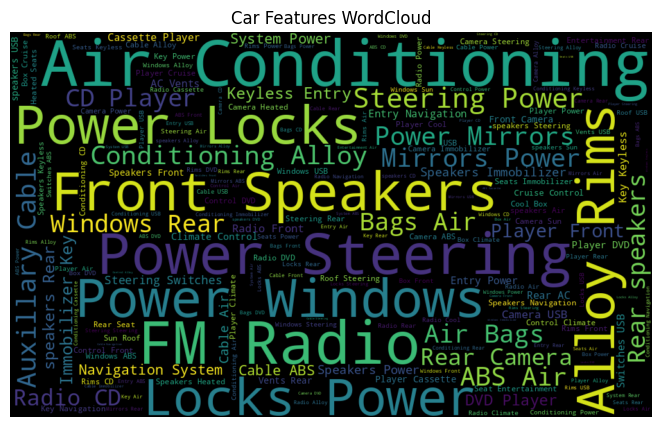

In [22]:
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(' '.join(df['Car Features']))

# Plot the WordCloud using seaborn
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Car Features WordCloud')
plt.show()

### 15. Brands-wise sales across years


In [23]:
group_years = df.groupby(["Year"])["Make"] # group years 
unique_years = sorted(df["Year"].unique().tolist()) # get unique years from dataset
companies = []
for year in unique_years: # get_group of particular year from 'group_years' line by line and then get unique cars companies in that year and finally, append it in new list
    companies.append(len(group_years.get_group(year).unique().tolist()))

In [24]:
print(companies, len(companies))
print(unique_years, len(unique_years))

[1, 1, 8, 7, 7, 9, 9, 9, 9, 8, 9, 8, 6, 6, 5, 6, 7, 6, 6, 6, 6, 7, 8, 7, 6, 7, 1] 27
[1989, 1993, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 27


In [25]:
# visualize it
cars_companies_in_years = pd.DataFrame({ # create dataset in which we have year and it corresponding car companies
    "years": unique_years,
    "car_companies": companies
}) 

# Plotting using Plotly
fig = px.line(cars_companies_in_years, x='years', y='car_companies', markers=True, title='Cars Companies Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Cars')

# Show the plot
fig.show()

### 16. Model-wise sales across years


In [26]:
group_years = df.groupby(["Year"])["Model"] # group years 
unique_years = sorted(df["Year"].unique().tolist()) # get unique years from dataset
models = []
for year in unique_years: # get_group of particular year from 'group_years' line by line and then get unique cars companies in that year and finally, append it in new list
    models.append(len(group_years.get_group(year).unique().tolist()))

In [27]:
print(models, len(models))
print(unique_years, len(unique_years))

[1, 1, 18, 20, 24, 26, 29, 28, 36, 35, 30, 27, 26, 29, 28, 25, 27, 24, 29, 28, 26, 24, 25, 23, 17, 17, 1] 27
[1989, 1993, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024] 27


In [28]:
# cars_over_years
cars_models_in_years = pd.DataFrame({ # create dataset in which we have year and it corresponding car companies
    "years": unique_years,
    "car_models": models
}) 

# Plotting using Plotly
fig = px.line(cars_models_in_years, x='years', y='car_models', markers=True, title='Cars Models Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Car Models')

# Show the plot
fig.show()

### 17. Distribution of Prices


In [29]:
fig = ff.create_distplot([df["Price"]], ["Price"], colors=["skyblue"], show_hist=False, show_rug=False, show_curve=True)
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Density"
)
fig.show()

### 18. Top 10 Highest prices cars


In [30]:
df[df["Price"]==5000000][["Make","Model","Year","Price","KM's driven"]].sort_values(by="Year").head(10)

,Make,Model,Year,Price,KM's driven
670,Honda,Civic Oriel,2017,5000000,83000
711,Honda,Civic Oriel,2017,5000000,72000
5934,Toyota,Altis Grande,2017,5000000,52000
1392,Honda,Civic Prosmetic,2017,5000000,116000
2756,Honda,City IVTEC,2017,5000000,94000
4413,Honda,Civic Oriel,2017,5000000,90000
7379,Honda,Civic Oriel,2017,5000000,109000
5272,Honda,Civic Oriel,2017,5000000,38000
4445,Toyota,Altis Grande,2018,5000000,99850
1376,Toyota,Corolla GLI,2019,5000000,30000


### 19. Top 10 Cheap price cars


In [31]:
df[df["Price"]<=350000].reset_index(drop=True).head(10)

,Ad ID,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Car Features,City
0,1080135749,Suzuki,Ravi,2005,100000,290000,Petrol,Karachi,Original,Imported,Manual,Used,"Gulistan-e-Jauhar - Block 16-A, Karachi",ABS,Karachi
1,1080707280,Suzuki,Mehran VXR,2003,10000,350000,Petrol,Karachi,Original,Local,Manual,Used,"Safoora Goth, Karachi",AM/FM Radio,Karachi
2,1080202667,KIA,Classic,2000,162000,325000,CNG,Karachi,Original,Local,Manual,Used,"Nazimabad 3, Karachi","Air Bags, Alloy Rims, AM/FM Radio, Power Locks...",Karachi
3,1080706024,Suzuki,Baleno,2005,533528,315000,Petrol,Lahore,Original,Local,Automatic,Used,"Audit & Accounts Phase 1, Lahore","Alloy Rims, AM/FM Radio, CD Player, Power Stee...",Lahore
4,1080922108,KIA,Classic,2003,50000,315000,Petrol,Karachi,Original,Imported,Manual,Used,"Korangi Road, Karachi","Air Conditioning, Front Speakers, Power Windows",Karachi
5,1079992474,KIA,Classic,2000,15000,300000,Petrol,Lahore,Original,Imported,Manual,Used,"Jamshed Town, Karachi","AM/FM Radio, Front Speakers, Power Locks, Powe...",Karachi
6,1080405992,KIA,Classic,2001,120000,300000,Petrol,Lahore,Original,Local,Manual,Used,"Shahkot - Sangla Hill Road, Sangla Hill","AM/FM Radio, Cassette Player, Front Speakers",Sangla Hill
7,1080030376,Suzuki,Mehran VXR,2002,1000,340000,Petrol,Karachi,Original,Local,Manual,Used,"Latifabad Unit 8, Hyderabad",ABS,Hyderabad
8,1080337588,KIA,Classic,2000,10000,320000,Petrol,Multan,Original,Local,Manual,Used,"Al Nabi Colony, Gujrat",AM/FM Radio,Gujrat
9,1080312246,Hyundai,Santro,2000,12345,345000,Petrol,Karachi,Original,Imported,Manual,Used,"Gulshan-e-Maymar, Karachi","Air Conditioning, Alloy Rims, Front Speakers, ...",Karachi


### 20. Top 12 Cities where sellers are more

In [32]:
more_sellers = df["City"].value_counts().reset_index().head(12)
more_sellers

,City,count
0,Karachi,2250
1,Lahore,1994
2,Islamabad,792
3,Rawalpindi,562
4,Faisalabad,416
5,Multan,256
6,Sialkot,210
7,Gujranwala,199
8,Peshawar,163
9,Punjab,162


In [33]:
# visualize it
fig = px.line(more_sellers, x="City", y="count", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Cities", yaxis_title="Sellers Count")
fig.show()

### 21. Top 10 models that exist mostly according to their frequency


In [34]:
most_frequent_models = df["Model"].value_counts().reset_index().head(20)
most_frequent_models

,Model,count
0,City IVTEC,615
1,Alto,550
2,Bolan,531
3,Cuore,509
4,Corolla GLI,481
5,Mira,463
6,Santro,454
7,Mehran VXR,435
8,Wagon R,395
9,Civic Prosmetic,331


In [35]:
fig = px.bar(most_frequent_models, x="Model", y="count", color="Model")
fig.update_layout(xaxis_title="Most Frequent Models", yaxis_title="Counts")
fig.show()

### 22. Mean prices of car companies


In [36]:
mean_prices = df.groupby(["Make"])["Price"].mean().reset_index()
mean_prices

,Make,Price
0,Changan,3.062677e+06
1,Chevrolet,7.078312e+05
2,Daihatsu,1.633646e+06
3,FAW,1.227285e+06
4,Honda,2.655438e+06
5,Hyundai,8.840969e+05
6,KIA,1.738466e+06
7,Mercedes,3.480756e+06
8,Mitsubishi,1.542430e+06
9,Suzuki,1.483125e+06


In [37]:
# visualize it
fig = px.line(mean_prices, x='Make', y='Price', markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Car Brands", yaxis_title="Mean Price")
fig.show()

### 23. Mean Distances covered by car companies


In [38]:
mean_distances = df.groupby(["Make"])["KM's driven"].mean().reset_index()
mean_distances

,Make,KM's driven
0,Changan,32606.770833
1,Chevrolet,100327.246753
2,Daihatsu,98216.939548
3,FAW,96302.007299
4,Honda,110071.667633
5,Hyundai,119383.863436
6,KIA,64971.756410
7,Mercedes,142196.311111
8,Mitsubishi,132884.313253
9,Suzuki,82591.880327


In [39]:
# visualize it
fig = px.line(mean_distances, x='Make', y="KM's driven", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Car Brands", yaxis_title="Mean Distance Covered")
fig.show()

### 24. Year vs Price vs KM's driven

In [40]:
fig = px.scatter_3d(df, x="Year",y="Price",z="KM's driven",color="KM's driven")
fig.show()

### 25. Year vs Price vs KM's driven on basis of Transmission

In [41]:
fig = px.scatter_3d(df, x="Year",y="Price",z="KM's driven",color="Transmission", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

### 26. Year vs Price vs KM's driven on basis of Car Documents


In [42]:
fig = px.scatter_3d(df, x="Year",y="Price",z="KM's driven",color="Car documents", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

### 27. Year vs Price vs KM's driven on basis of Assembly


In [43]:
fig = px.scatter_3d(df, x="Year",y="Price",z="KM's driven",color="Assembly", color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

# Company Wise Analysis

#### User will provide company name. All graphs will be made on that company models.

In [44]:
# 1. user will provide company
company = "Honda"
# create dataframe in which only that company models will be included
brands_df = df[df["Make"]==company]

### 1. Total Models 

In [45]:
len(brands_df["Model"].unique().tolist())

9

### 2. Total Sellers

In [46]:
# Total Sellers
len(brands_df["Ad ID"].unique().tolist())

1724

### 3. Seller Cities Count

In [47]:
# Seller Cities Count
len(brands_df["City"].unique())

84

### 4. Year Range of given Company Brand

In [48]:
print(brands_df['Year'].min(), '-' , brands_df['Year'].max())

2000 - 2023


### 5. KM's driven distances Range

In [49]:
print(brands_df["KM's driven"].min(), '-' , brands_df["KM's driven"].max())

1000 - 480000


### 6. Prices Range

In [50]:
print(brands_df['Price'].min(), '-' , brands_df['Price'].max())

650000 - 5000000


### 7. All Graph Plots related to Selected Company Brand in single cell

WordCloud of Car Features of given Company Brand


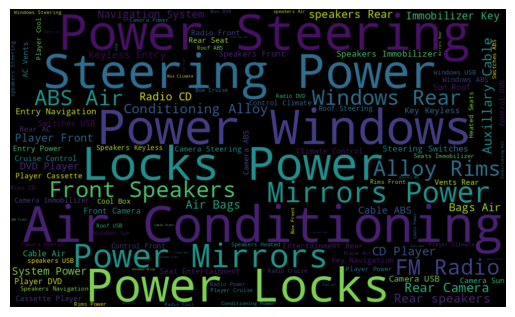

Highes Prices Car Brands
        Ad ID   Make            Model  Year    Price  KM's driven  \
0  1079298574  Honda      City Aspire  2021  5000000        25000   
1  1080073333  Honda      Civic Oriel  2017  5000000        38000   
2  1080739962  Honda       City IVTEC  2017  5000000        94000   
3  1080828164  Honda      City Aspire  2022  5000000         4800   
4  1079109200  Honda  Civic Prosmetic  2017  5000000       116000   

             Seller Location  
0     Bahria Town, Islamabad  
1  Chak No 89 N. B, Sargodha  
2          Gohadpur, Sialkot  
3   North Nazimabad, Karachi  
4            Others, Chakwal  
Lowest Prices Car Brands
        Ad ID   Make        Model  Year   Price  KM's driven  \
0  1080645935  Honda    City IDSI  2000  650000         1234   
1  1079384061  Honda   City IVTEC  2001  700000       150000   
2  1080665963  Honda  City Aspire  2000  725000       178000   
3  1075564365  Honda   City IVTEC  2000  725000       123456   
4  1080527254  Honda   City V

In [51]:
# 1. visualize the Models Distribtion
fig = px.histogram(brands_df, x="Model", color="Model")
fig.update_layout(xaxis_title="Given Brand Models", yaxis_title="Counts", title="Models Distribution")
fig.show()

# 2. Mean of Prices
mean_distances = brands_df.groupby(["Model"])["Price"].mean().reset_index().sort_values(by="Price")
# visualize it
fig = px.line(mean_distances, x='Model', y="Price", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Car Brands", yaxis_title="Mean Prices", title="Models Mean Prices")
fig.show()

# 3. Mean of KM's driven distances
mean_distances = brands_df.groupby(["Model"])["KM's driven"].mean().reset_index().sort_values(by="KM's driven")
# visualize it
fig = px.line(mean_distances, x='Model', y="KM's driven", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Car Brands", yaxis_title="Mean Distance Covered", title="Models Mean Distances Covered")
fig.show()

# 4. Prices Distribution
fig = ff.create_distplot([brands_df["Price"]], ["Price"], colors=["skyblue"], show_hist=False, show_rug=False, show_curve=True)
fig.update_layout(
    xaxis_title="Price",
    yaxis_title="Density",
    title="Models Price Distribution with KDE"
)
fig.show()

# 5. Years Distribution
df_sorted_years = brands_df.sort_values(by="Year")
fig = px.histogram(df_sorted_years, x="Year", color="Year")
fig.update_layout(xaxis_title="Year", yaxis_title="Count", title="Models Years Distribution")
fig.show()

# 6. Fuel Type Distribution
fig = px.pie(brands_df, names="Fuel", hole=0.5, opacity=0.82)
fig.update_layout(title="Models Fuel Type Distribution")
fig.show()

# 7. Transmission Distribution
fig = px.pie(brands_df, names="Transmission", hole=0.5, opacity=0.82)
fig.update_layout(title="Models Transmission Distribution")
fig.show()

# 8. Car Documents Distribution
fig = px.pie(brands_df, names="Car documents", hole=0.5, opacity=0.82)
fig.update_layout(title="Models Car Documents Distribution")
fig.show()

# 9. Assembly Distribution
fig = px.pie(brands_df, names="Assembly", hole=0.5, opacity=0.82)
fig.update_layout(title="Models Assembly Distribution")
fig.show()

# 10. Word Cloud of Car Features
print("WordCloud of Car Features of given Company Brand")
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(' '.join(brands_df["Car Features"]))
# plot wordcloud with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 11. Models Across Years
def models_sales_over_years(df):
    group_years = df.groupby(["Year"])["Model"] # group years 
    unique_years = sorted(df["Year"].unique().tolist()) # get unique years from dataset
    models = []
    for year in unique_years: # get_group of particular year from 'group_years' line by line and then get unique cars companies in that year and finally, append it in new list
        models.append(len(group_years.get_group(year).unique().tolist()))

    dataset = pd.DataFrame({ # create dataset in which we have year and it corresponding car companies
        "Years": unique_years,
        "Models": models
    }) 
    return dataset

models_over_years = models_sales_over_years(brands_df)
# visualize it
fig = px.line(models_over_years, x='Years', y='Models', markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title='Year', yaxis_title='Car Models', title="Model-wise Sales Across Years")
fig.show()

# 12. Top 5 Cities where sellers are more
more_sellers_df = brands_df["City"].value_counts().reset_index()
more_sellers_df = more_sellers_df.head(5)
# visualize it
fig = px.line(more_sellers_df, x="City", y="count", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Cities", yaxis_title="Sellers Count", title="Top 5 cities where more seller exist of given Company Brand")
fig.show()

# 13. Highest Price Car Brands
print("Highes Prices Car Brands")
highest_prices = brands_df.sort_values(by="Price", ascending=False).head(5).reset_index(drop=True)[["Ad ID","Make","Model","Year","Price","KM's driven","Seller Location"]].sort_values(by="Price").reset_index(drop=True)
print(highest_prices.head(5))

# 14. Lowest Price Car Brands
print("Lowest Prices Car Brands")
lowest_prices = brands_df.sort_values(by="Price").head(5).reset_index(drop=True)[["Ad ID","Make","Model","Year","Price","KM's driven","Seller Location"]].sort_values(by="Price").reset_index(drop=True)
print(lowest_prices.head(5))

# 15. Relationship between Year, Price, KM's driven
fig = px.scatter_3d(brands_df, x="Year", y="Price", z="KM's driven", color="KM's driven", color_continuous_scale='Viridis')
fig.show()

# Models-Wise Analysis

### 1. User will provide Model Name

In [52]:
models_df = df[df["Model"] == "Alto"]
models_df

,Ad ID,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Car Features,City
39,1080886103,Suzuki,Alto,2012,58600,1165000,Petrol,Karachi,Original,Local,Manual,Used,"Scheme 33, Karachi",USB and Auxillary Cable,Karachi
47,1080865897,Suzuki,Alto,2023,15000,2900000,Petrol,Punjab,Original,Local,Automatic,Used,"Mohammad Ali Jinnah Road, Okara","ABS, Air Bags, Air Conditioning, Alloy Rims, A...",Okara
50,1080887449,Suzuki,Alto,2003,90000,680000,Petrol,Karachi,Original,Local,Manual,Used,"Shahra-e-Faisal, Karachi","Air Conditioning, AM/FM Radio, CD Player, Keyl...",Karachi
74,1080622383,Suzuki,Alto,2022,7300,2815000,Petrol,Karachi,Original,Local,Automatic,Used,"Punjab Chowrangi, Karachi",Air Bags,Karachi
105,1080721691,Suzuki,Alto,2004,100000,480000,CNG,Karachi,Original,Local,Manual,Used,"I.I. Chundrigar Road, Karachi",Power Steering,Karachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072,1080828046,Suzuki,Alto,2004,160000,575000,Petrol,Karachi,Original,Local,Manual,Used,"Nazimabad 1, Karachi",Alloy Rims,Karachi
9077,1079508506,Suzuki,Alto,2022,19000,2450000,Petrol,Hyderabad,Original,Local,Manual,Used,"Qasimabad Phase 2, Hyderabad","Air Bags, AM/FM Radio, CD Player, Keyless Entr...",Hyderabad
9109,1078175092,Suzuki,Alto,2007,103000,1200000,Petrol,Karachi,Original,Imported,Automatic,Used,"Quetta, Balochistan","ABS, Air Bags, Air Conditioning, Alloy Rims, A...",Balochistan
9153,1080757140,Suzuki,Alto,2005,10000,780000,Petrol,Islamabad,Original,Imported,Manual,Used,"F-8 Markaz, Islamabad","Air Conditioning, Alloy Rims, DVD Player, Navi...",Islamabad


### 2. Show in which cities, selected Model is Saled

In [53]:
cities = models_df["City"].value_counts().reset_index(name="Count")
print(cities)

# visualize it
fig = px.line(cities, x="City", y="Count", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Cities", yaxis_title="Cities Count", title="Line Plot")
fig.show()

fig = px.bar(cities, x="City", y="Count", color="City")
fig.update_layout(xaxis_title="Cities", yaxis_title="Cities Count", title="Bar Plot")
fig.show()

                  City  Count
0              Karachi    204
1               Lahore     97
2            Islamabad     50
3           Rawalpindi     28
4             Peshawar     20
5               Multan     19
6              Sialkot     13
7           Abbottabad     10
8           Faisalabad      8
9             Sargodha      5
10          Gujranwala      5
11              Gujrat      5
12              Mardan      5
13          Bahawalpur      5
14                 Wah      5
15       Rahimyar Khan      4
16             Chakwal      4
17           Hyderabad      4
18               Swabi      4
19              Quetta      3
20               Kohat      3
21              Attock      3
22         Balochistan      3
23              Mirpur      2
24    Dera Ismail Khan      2
25            Mianwali      2
26  Khyber Pakhtunkhwa      2
27               Okara      2
28          Liaquatpur      2
29              Kamoke      2
30              Sukkur      1
31     Dera Ghazi Khan      1
32        

# City Wise Analysis

### 1. User will provide City Name

In [54]:
# 1. select city
cities_df = df[df["City"]=="Lahore"]
cities_df

,Ad ID,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Car Features,City
3,1076081635,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore","ABS, Air Bags, Air Conditioning, Alloy Rims, A...",Lahore
8,1076448625,Honda,City IDSI,2004,160000,1230000,Petrol,Sindh,Original,Local,Manual,Used,"Allama Iqbal Town - Huma Block, Lahore","ABS, Air Conditioning, Alloy Rims, CD Player, ...",Lahore
16,1080231541,Daihatsu,Move,2013,73000,2150000,Petrol,Lahore,Original,Imported,Automatic,Used,"DHA Phase 1, Lahore","ABS, Air Bags, Air Conditioning, Climate Contr...",Lahore
25,1080769710,Suzuki,Cultus VXR,2009,52000,1050000,Petrol,Lahore,Original,Local,Manual,Used,"New Samanabad, Lahore","Air Conditioning, CD Player, Immobilizer Key, ...",Lahore
26,1080849024,Honda,City Aspire,2021,75000,4199000,Petrol,Lahore,Original,Local,Automatic,Used,"Township - Sector A2, Lahore","Air Conditioning, Alloy Rims, AM/FM Radio, DVD...",Lahore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9150,1080752426,Toyota,Altis Grande,2015,85000,4190000,Petrol,Lahore,Original,Local,Automatic,Used,"Thokar Niaz Baig, Lahore",Immobilizer Key,Lahore
9160,1080812201,Suzuki,Cultus VXR,2005,100000,590000,Petrol,Lahore,Original,Imported,Manual,Used,"Punjab Small Industries Colony, Lahore","Air Conditioning, Alloy Rims, AM/FM Radio, Rea...",Lahore
9164,1080058683,Toyota,Corolla GLI,2018,105000,3980000,Petrol,Lahore,Original,Local,Manual,Used,"Wapda Town Phase 1, Lahore","ABS, Air Bags, Air Conditioning, AM/FM Radio, ...",Lahore
9165,1080374915,Honda,City Aspire,2016,72000,3300000,Petrol,Islamabad,Original,Local,Automatic,Used,"Alfalah Town, Lahore",Air Conditioning,Lahore


### 2. Show in selected City, which models are saled

In [55]:
cities = cities_df["Model"].value_counts().reset_index(name="Count")
print(cities)

# visualize it
fig = px.line(cities, x="Model", y="Count", markers=True, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(xaxis_title="Cities", yaxis_title="Models Count", title="Line Plot")
fig.show()

fig = px.bar(cities, x="Model", y="Count", color="Model")
fig.update_layout(xaxis_title="Cities", yaxis_title="Models Count", title="Bar Plot")
fig.show()

              Model  Count
0        City IVTEC    191
1            Santro    133
2           Wagon R    123
3              Alto     97
4             Cuore     85
5        Cultus VXR     84
6       City Aspire     82
7             Bolan     81
8        Mehran VXR     80
9             Swift     75
10  Civic Prosmetic     73
11             Mira     69
12   Corrolla Altis     67
13      Corolla GLI     65
14            Yaris     62
15        City IDSI     57
16             Move     49
17      Civic Oriel     48
18      Corolla XLI     47
19           Alsvin     35
20           Lancer     31
21            Hijet     30
22            Every     29
23     Altis Grande     27
24          Picanto     26
25       City Vario     25
26          Karvaan     25
27            Passo     22
28           Baleno     22
29             X-PV     22
30         Ek Wagon     17
31              Joy     16
32               V2     13
33          Classic     12
34          Spectra     12
35       Terios Kid     10
3

End of Code!